In [8]:
!pip install fastbook
from fastbook import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#search images using duck duck go scrapper
urls = search_images_ddg('bird photos', max_images=1)
print(len(urls), urls[0])

1 https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg


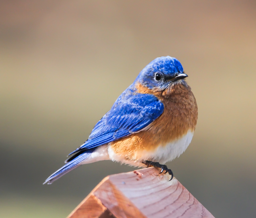

In [16]:
dest = Path('bird.jpg')
if not dest.exists():
  download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

#images are made up of 2d matrix with 0-256 color

In [17]:
import os
from pathlib import Path

searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  path.mkdir()

for o in searches:
  dest = (path / o)
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=dest)


In [ ]:
# broken images break the NN so this is used to discard all broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

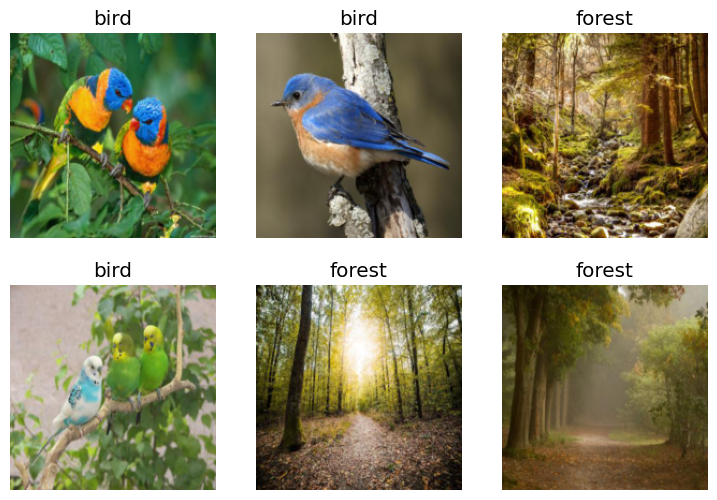

In [20]:
# Data block gives fast ai to give all parameters to create a data vision model dataset
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f'This is a: {is_bird}. ')
print(f'Probability it is a bird: {probs[0]:.4f}')